<a href="https://colab.research.google.com/github/vivri1216/HandsOnMachineLearning/blob/master/Chapter11_TrainingDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training Deep Neural Networks

Training Deep Neural Networks (DNN from now on) is everything but an easy task. The space of all possible models is very complex, also a lot of parameters are important to get right in order to obtain a model that performs well.

Speed is a crucial factor in model training, DNN have a lot of parameters to train and often one has neither enough computational power or time to train the model fully.

In this notebook some training algorithms are shown. Additionally some basic regularization techniques are shown. Regularization is the process of making the model more reliable in general, trying to dimish its dependability from small variations in the input data. The whole process aims at making the model more robust.

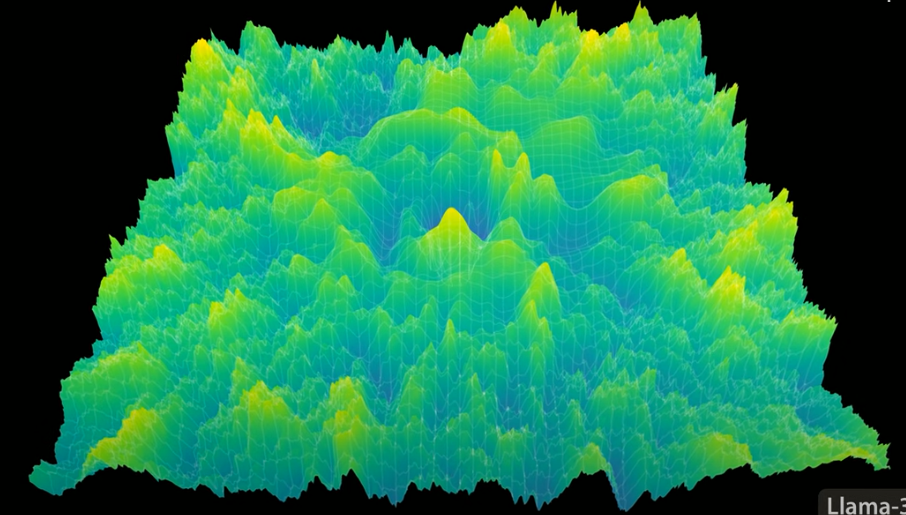

This is the loss space. Here we are trying to find a minimum for the loss function with our chosen training algorithm

image: https://www.youtube.com/watch?v=NrO20Jb-hy0

## The problem we try to fix

The exploding and vanishing gradient problems are common issues encountered when training deep neural networks.

1. Vanishing Gradient Problem: This occurs when gradients become extremely small as they propagate backward through many layers. This makes the updates to the weights in the earlier layers very small, effectively preventing them from learning.

2. Exploding Gradient Problem: This is the opposite of the vanishing gradient problem. Gradients become extremely large, leading to very large updates to the weights. This can cause the training process to become unstable and the model's performance to deteriorate rapidly.

These problems can make training deep networks challenging and require specific techniques to mitigate.

In a 2010 fundamental paper the causes of these two flaws of DNN training process were pointed to be mainly two:
1. the **saturation** of the activation function. Take for example the sigmoid function - historically on of the first activation functions used on neural networks - if it takes values to near to zero or one its derivative will be almost equal to zero, meaning that the overall gradient of the loss function will be near zero. This will yield no updates at all in the parameters of the net - we assume to use Gradient Descent as training algorithm - stopping the training.
2. the **variance difference** between the input and output of a layer. If this difference is positive, the gradient of the loss function could explode, making the parameters updates too big. This means that we will never settle to optimal values for them.

But not everything is lost, in the same paper some solutions were provided:
1. changing the activation function (relu was the first one)
2. regularizing the output of a layer to have variance equal to its input (batch normalization is commonly used for this purpose)
3. Finding a better inizialization for the parameters in the net. The idea is that if we can start from an educated guess value for them, the training will cinverge to a better overall solution

From here on, we reccomend to check out the notes on this topic. Only the code will be shown.

### Initialization

In [1]:
import keras

In [2]:
# he normal initialization
layer = keras.layers.Dense(10, activation = "relu", kernel_initializer=keras.initializers.he_normal())

In [ ]:
# LeCun initialization
layer = keras.layers.Dense(10, activation = "relu", kernel_initializer=keras.initializers.LecunNormal())

In [ ]:
# Glorot Normal
layer = keras.layers.Dense(10, activation = "relu", kernel_initializer=keras.initializers.GlorotNormal())

### Activation Functions

In [ ]:
# sigmoid: the old faithful
layer = keras.layers.Dense(10, activation = keras.activations.sigmoid(), kernel_initializer=keras.initializers.he_normal())

In [ ]:
# softmax: multiclass classification
layer = keras.layers.Dense(10, activation = "softmax", kernel_initializer=keras.initializers.he_normal())

In [ ]:
# relu activation: general purpose choice, fast to compute
layer = keras.layers.Dense(10, activation = "relu", kernel_initializer=keras.initializers.he_normal())

The vanishing ReLU problem occurs when ReLU neurons get stuck in a state where they output zero and their gradients are zero, preventing them from contributing to the learning process.

In [8]:
# leaky relu: general purpose choice, solves the vaninshing relu problem
# the negative_slope parameter is tipically set to 0.01
# in keras its default is 0.2
layer = keras.layers.Dense(10, activation = "leaky_relu")

In [7]:
# elu: experimentally outperforms relu and leaky relu, though takes more time to compute
# alpha is usually set to 1
layer = keras.layers.Dense(10, activation = "elu")

In [ ]:
# selu: scaled elu variant
# may trigger self-normalization effect under proper conditions
# automatically fuxes the exploding/vanishing gradient problem
layer = keras.layers.Dense(10, activation = "selu")

**Working**

Basically, the SELU activation function multiplies scale (> 1) with the output of the keras.activations.elu function to ensure a slope larger than one for positive inputs.
The values of alpha and scale are chosen so that the mean and variance of the inputs are preserved between two consecutive layers as long as the weights are initialized correctly.
Alpha and scale are pre-defined constants (alpha=1.67326324 and scale=1.05070098).

**Correct initialization**

1. standardize input features (mean zero and standard deviation one)
2. LeCun normal initialization
3. Sequential network architecture

In [14]:
# correct selu initialization
input_layer = keras.layers.InputLayer(input_shape=(28,28))
layer1 = keras.layers.Dense(10, activation = "selu", kernel_initializer=keras.initializers.LecunNormal())
model = keras.models.Sequential([
    input_layer,
    layer1
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 28, 10)         │           290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 290 (1.13 KB)

 Trainable params: 290 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.weights

Also versions of the layer with the chosen activation function are implemented within keras. They can be directly added to the sequential network object created.

In [9]:
model = keras.models.Sequential()
# these layers will take the activation of the previous layer and apply to it the relu function
model.add(keras.layers.ReLU())
model.add(keras.layers.Softmax())

### Batch Normalization

Batch Normalization is implemented in Keras as a layer, meaning that it will perform an operation on any input signal it will process. So if you want to apply batch nomalization to the output of the activation function of a layer, just place a `BatchNormal` layer after the layer the output you want to normalize

In [21]:
from sklearn.datasets import fetch_openml
X,y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [22]:
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X, y, train_size=10000)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
X_train_red = pca.fit_transform(X_train)
X_test_red = pca.fit_transform(X_test)

In [25]:
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

In [39]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape = X_train_red.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation = "elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_14          │ (None, 331)            │         1,324 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 300)            │        99,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,134 (410.68 KB)

 Trainable params: 103,872 (405.75 KB)

 Non-trainable params: 1,262 (4.93 KB)

In [40]:
model.compile(optimizer="adam", loss = keras.losses.SparseCategoricalCrossentropy(), metrics = ["accuracy"])


In [41]:
history = model.fit(X_train_red, y_train_int, epochs = 10, validation_split = 0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7595 - loss: 0.8018 - val_accuracy: 0.9115 - val_loss: 0.2960
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9239 - loss: 0.2527 - val_accuracy: 0.9415 - val_loss: 0.2020
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9547 - loss: 0.1478 - val_accuracy: 0.9562 - val_loss: 0.1560
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9721 - loss: 0.0906 - val_accuracy: 0.9632 - val_loss: 0.1323
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9809 - loss: 0.0608 - val_accuracy: 0.9645 - val_loss: 0.1327
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9866 - loss: 0.0420 - val_accuracy: 0.9645 - val_loss: 0.1289
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9882 - loss: 0.0347 - val_accuracy: 0.9638 - val_loss: 0.1392
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9917 - loss: 0.027

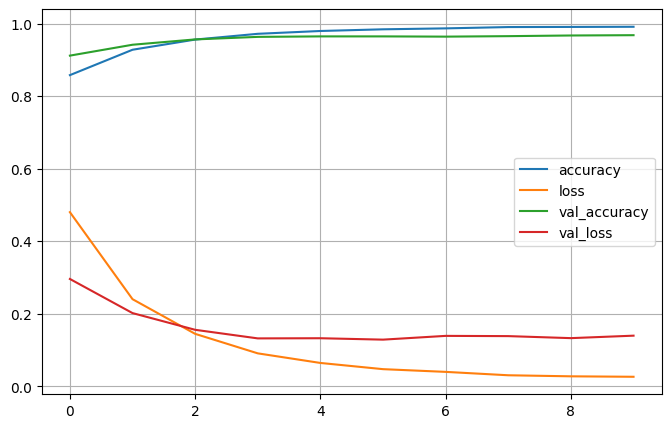

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

### Gradient Clipping

Gradient clipping is a technique used in neural network training to prevent the gradients from becoming too large. Large gradients can lead to unstable training and exploding gradients. Clipping the gradients ensures that their values stay within a reasonable range.

In [ ]:
# the learning |lr| < clipvalue
optimizer = keras.optimizers.SGD(clipvalue = 0.1)
model.compile(loss="mse", optimizer=optimizer)

### Transfer Learning

Deep learning models learn hierarchical representations of data. Early layers in a convolutional neural network (CNN) might learn basic features like edges and corners, while deeper layers learn more complex patterns specific to the training data. Transfer learning utilizes these learned early-stage features, which are often transferable across different visual tasks.

Benefits:

1. Reduced Training Time: Training from scratch can take a long time, especially with large DNNs and limited computational resources. Transfer learning significantly reduces training time.
2. Less Data Needed: Since the model already has a good starting point, it requires less data to achieve good performance on the new task compared to training from scratch.
3. Improved Performance: The pre-trained model has often learned robust and generalizable features, leading to better performance on the new task.

In [ ]:
model_A = keras.models.load_model("my_model.h5")
model_B_on_A = keras.models.Sequantial(model.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

### Faster Training Algorithms

Check out the documentation (https://keras.io/api/optimizers/) and the notes for further detalils

In [ ]:
# SGD: the old faithful
optimizer = keras.optimizers.SGD()
# RMSPROP
optimizer = keras.optimizers.RMSprop()
# ADAGRAD: too slow for training DNN
optimizer = keras.optimizers.Adagrad()
# Adam: the new Old Faithful
# Beta1 = 0.9, Beta2 = 0.999
optimizer = keras.optimizers.adam()
# Nadam: Adam + Nesterov accelerated gradient: faster than Adam
optimizer = keras.optimizers.Nadam()

### Regularization: l1 and l2

In [ ]:
layer = keras.layers.Dense(100, activation = "elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer = keras.regularizers.l1(0.01))

layer = keras.layers.Dense(100, activation = "elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer = keras.regularizers.l2(0.01))

### Regularization: Dropout

Just add a Dropout layer, that deactivates (sets to 0) on average a fraction of p outputs of the previous layer. This has the effect of deactivating some of the neurons in the next layer, thus making the DNN more robust, achieving these regularization effect.

In [43]:
# the p of above. This quantity is referred as dropout probability
dropout_layer = keras.layers.Dropout(rate = 0.3)